![StatModels](https://www.durhamtech.edu/themes/custom/durhamtech/images/durham-tech-logo-web.svg) 

## Applications - Statistical Modeling

This lecture provides foundational knowledge and examples of machine learning modeling concepts by examining stock price data.

---

# Table of Contents

### Jupyter Overview
#### <a href='#1'>Useful Links</a>
#### <a href='#2'>Introduction to Jupyter Notebooks</a>
#### <a href='#3'>Cell Types</a>
* Markdown 
* Code
    1. Running One Cell
    2. Other Run Options

#### <a href='#4'>Tips and Tricks</a>

#### <a href='#55'>Weekly Readings/Videos</a>
#### <a href='#56'>Extra Practice</a>

## Introduction

## Data Sources

1. Weather: https://www.weather.gov/wrh/climate?wfo=okx
2. SP 500 Components: https://datahub.io/core/s-and-p-500-companies
3. SP 500 Company Info: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
4. FRED https://fred.stlouisfed.org/docs/api/fred/series.html
5. TD Ameritrade Data Dicitionary https://developer.tdameritrade.com/content/streaming-data#_Toc504640567



In [1]:
import requests
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')
key = 'RGOLSJPSTGVAN4NTN4DLWJE71SU7SIH0'

In [2]:
yahoo_data=pd.read_csv('yahoo_data.csv', index_col=0)
yahoo_data

,open,close,prec,temp,DFF,UNRATE,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
252,0.000000,73.910004,2.31,31.2,3.50,5.5,4.519881e+06,9.292337e+05,69.227460,3.254833,4.207596e+03,0.041764,83.660004
253,0.000000,74.059998,2.31,31.2,3.50,5.5,4.521944e+06,9.279823e+05,69.273452,3.238684,4.101602e+03,0.041550,83.449997
254,0.000000,74.300003,2.31,31.2,3.50,5.5,4.524048e+06,9.268485e+05,69.318809,3.225283,4.007497e+03,0.041370,83.220001
255,0.000000,74.739998,2.31,31.2,3.50,5.5,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,83.550003
256,0.000000,74.629997,2.31,31.2,3.50,5.5,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,83.900002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14567,3464.899902,3465.389893,5.05,57.9,0.09,6.9,4.712277e+09,1.420226e+09,3129.904879,258.544825,2.306975e+06,1.177150,4566.479980
14568,3441.419922,3400.969971,5.05,57.9,0.09,6.9,4.712094e+09,1.420360e+09,3131.710831,259.294343,2.109958e+06,1.197375,4574.790039
14569,3403.149902,3390.679932,5.05,57.9,0.09,6.9,4.714545e+09,1.418567e+09,3133.212497,259.755008,1.914548e+06,1.212360,4551.680176
14570,3342.479980,3271.030029,5.05,57.9,0.09,6.9,4.716235e+09,1.417393e+09,3134.606386,260.191789,1.729118e+06,1.227693,4596.419922


## Regression

![FunnyReg](https://memegenerator.net/img/instances/49880835.jpg)

In [3]:
def data_split(df,y_var,scale=False):
    reg_df=df.copy()
    
    # train test split
    #y=reg_df.pop(y_var)
    #X=reg_df
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    
    # first 80% train
    x_train = reg_df.head(int(len(reg_df)*(0.8)))
    x_test = reg_df.iloc[max(x_train.index):]
    y_train = x_train.pop(y_var)
    y_test = x_test.pop(y_var)
    
    colz=x_train.columns
    
    if scale:
        
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
    return x_train, x_test, y_train, y_test, colz

def regression(x_train, x_test, y_train, y_test, colz):

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    print("Number of training records:", len(y_train))
    print("Number of testing records:",len(y_test))
    print("\nLinear Regression Results")

    # The coefficients
    print('\nCoefficients:')
    for x,y in zip(colz,regr.coef_):
        print(x,y)
    
    #The intercept
    print('\nIntercept:', regr.intercept_)      
    print('\nLinear Regression R^2 score on training data: %.4f' % regr.score(x_train,y_train))
    print('Linear Regression R^2 score on test data: %.4f' % r2_score(y_test, y_pred))
    
def lasso(x_train, x_test, y_train, y_test, colz):
    lasso = linear_model.Lasso(alpha=0.25)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    train_acc = lasso.score(x_train, y_train)
    test_acc = lasso.score(x_test, y_test)
    
    print('Lasso Regression Results:')
    print('Training acuracy =',train_acc)
    print('Test accuracy =',test_acc)

In [4]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'close_future')

In [5]:
regression(x_train, x_test, y_train, y_test, colz)

Number of training records: 11456
Number of testing records: 2613

Linear Regression Results

Coefficients:
open 0.7294901496907198
close 0.13058875829995834
prec 2.2327614281786543
temp -0.41402037077243137
DFF -3.815016401580789
UNRATE -1.309079034778995
volume_moving 1.924537270543829e-07
volume_moving_std -9.843411812007091e-07
close_moving -0.1934110684122106
close_moving_std 3.6162301458860515
volume_slope 2.0962091113834163e-05
close_slope 57.02239763120651

Intercept: 140.34161166998297

Linear Regression R^2 score on training data: 0.9479
Linear Regression R^2 score on test data: 0.4550


In [6]:
lasso(x_train, x_test, y_train, y_test, colz)

Lasso Regression Results:
Training acuracy = 0.9478955434972286
Test accuracy = 0.44998113346574514


In [7]:
def random_forest(x_train, x_test, y_train, y_test, colz, cat=False, est=10):
    # If continous y variable
    random_forest = RandomForestRegressor(n_estimators=est)
    
    # If categorical y variable
    if cat:
        random_forest = RandomForestClassifier(n_estimators=est)
    
    random_forest.fit(x_train, y_train)
    train_acc = random_forest.score(x_train, y_train)
    test_acc = random_forest.score(x_test, y_test)
    
    y_pred = random_forest.predict(x_test)
    
    print('Random Forest Results:')
    
    print('Training acuracy= ',train_acc)
    print('Test accuracy= ',test_acc)

    features = x_train.columns
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)

    plt.subplots(figsize=(15, 11))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def cart(x_train, x_test, y_train, y_test, colz, cat=False):
    # if continuous variable
    cart = DecisionTreeRegressor(random_state=12)
    if cat:
        cart = DecisionTreeClassifier(random_state=12)
    cart.fit(x_train, y_train)
    train_acc = cart.score(x_train, y_train)
    test_acc = cart.score(x_test, y_test)
    
    y_pred = cart.predict(x_test)
    
    print('CART Results:')
    
    print('CART training acuracy= ',train_acc)
    print('CART test accuracy= ',test_acc)

Random Forest Results:
Training acuracy=  0.9999226601408806
Test accuracy=  -2.8059563456224996


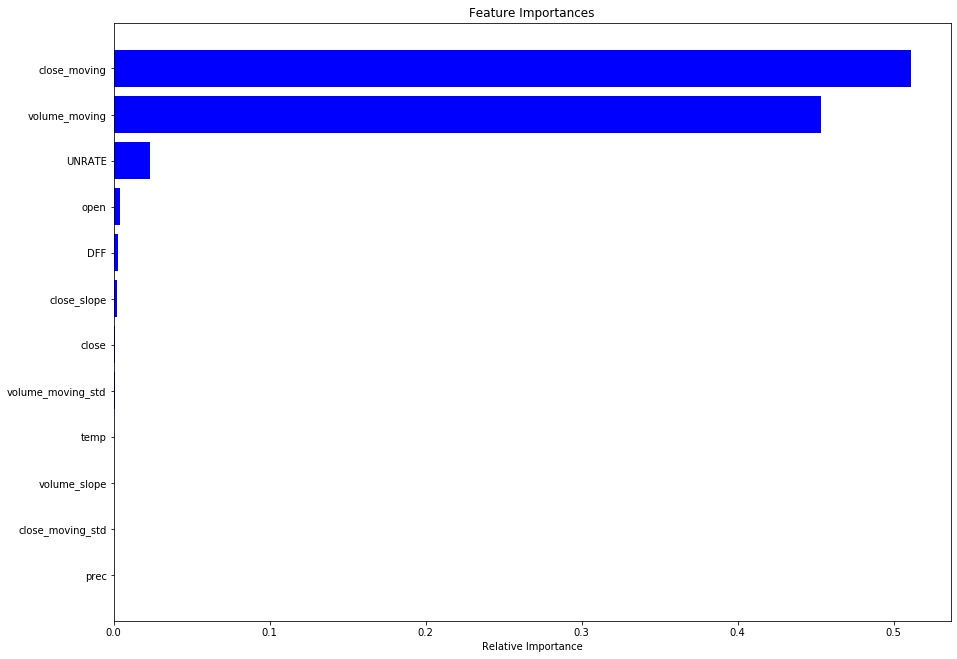

In [8]:
random_forest(x_train, x_test, y_train, y_test, colz)

In [9]:
cart(x_train, x_test, y_train, y_test, colz)

CART Results:
CART training acuracy=  1.0
CART test accuracy=  -2.746644880209774


## -------------PRACTICE-------------
1.

<a id='55'></a>
# Weekly Readings/Videos

https://blog.trinket.io/why-python/
    
https://towardsdatascience.com/top-16-python-applications-in-real-world-a0404111ac23

<a id='56'></a>
# Extra Practice